In [1]:
import sys
import os
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

=== Top 20 Keywords/Phrases ===


,Keyword/Phrase,Frequency
0,price,3235
1,target,3155
2,price target,3132
3,maintains,2317
4,estimate,2110
5,eps,1993
6,sales,1819
7,q1,1623
8,shares,1594
9,raises,1457


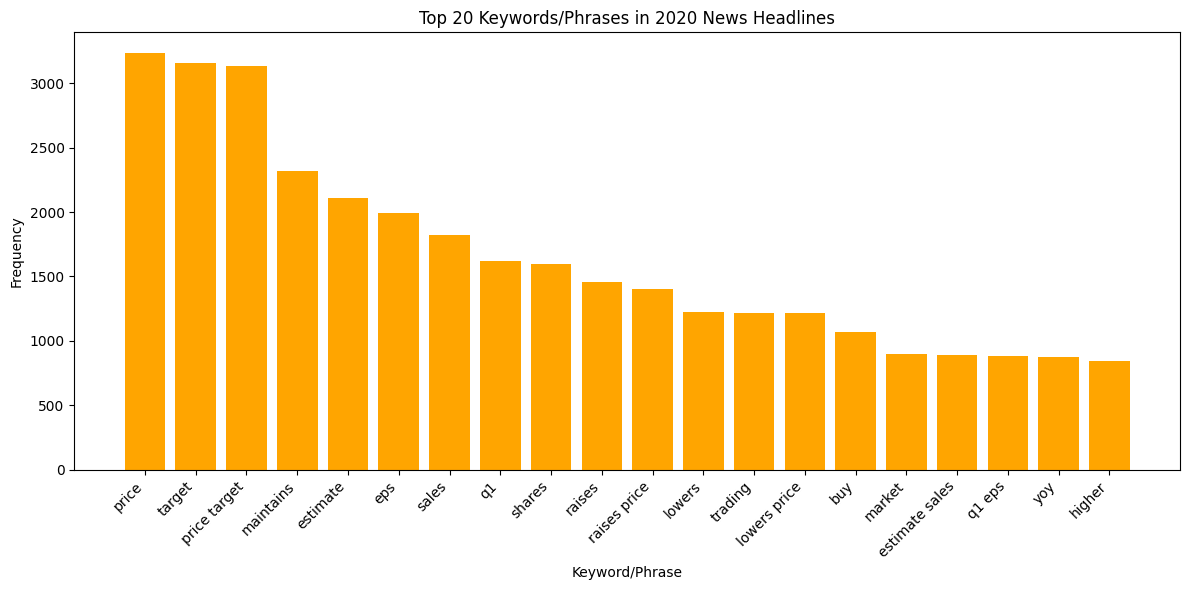


=== Identified Topics ===
Topic 1: stocks market session reports moving
Topic 2: estimate eps sales q1 yoy
Topic 3: shares trading higher company companies
Topic 4: price target maintains raises lowers
Topic 5: price target buy maintains raises

=== Topic Assignments (Sample) ===


,headline,Dominant_Topic,Topic_0_Prob,Topic_1_Prob,Topic_2_Prob,Topic_3_Prob,Topic_4_Prob
0,Stocks That Hit 52-Week Highs On Friday,0,0.885690,0.028571,0.028595,0.028571,0.028571
1,Stocks That Hit 52-Week Highs On Wednesday,0,0.885684,0.028571,0.028601,0.028571,0.028571
2,71 Biggest Movers From Friday,1,0.240017,0.639983,0.040000,0.040000,0.040000
3,46 Stocks Moving In Friday's Mid-Day Session,0,0.775232,0.025578,0.025005,0.025000,0.149184
4,B of A Securities Maintains Neutral on Agilent...,3,0.022241,0.022391,0.022281,0.569729,0.363358
5,"CFRA Maintains Hold on Agilent Technologies, L...",3,0.022222,0.022342,0.022264,0.910481,0.022691
6,"UBS Maintains Neutral on Agilent Technologies,...",4,0.022222,0.022584,0.022350,0.023071,0.909772
7,Agilent Technologies shares are trading higher...,2,0.015385,0.280498,0.673279,0.015437,0.015402
8,Wells Fargo Maintains Overweight on Agilent Te...,3,0.020000,0.020162,0.020033,0.919561,0.020244
9,10 Biggest Price Target Changes For Friday,3,0.225769,0.343221,0.028572,0.373275,0.029163


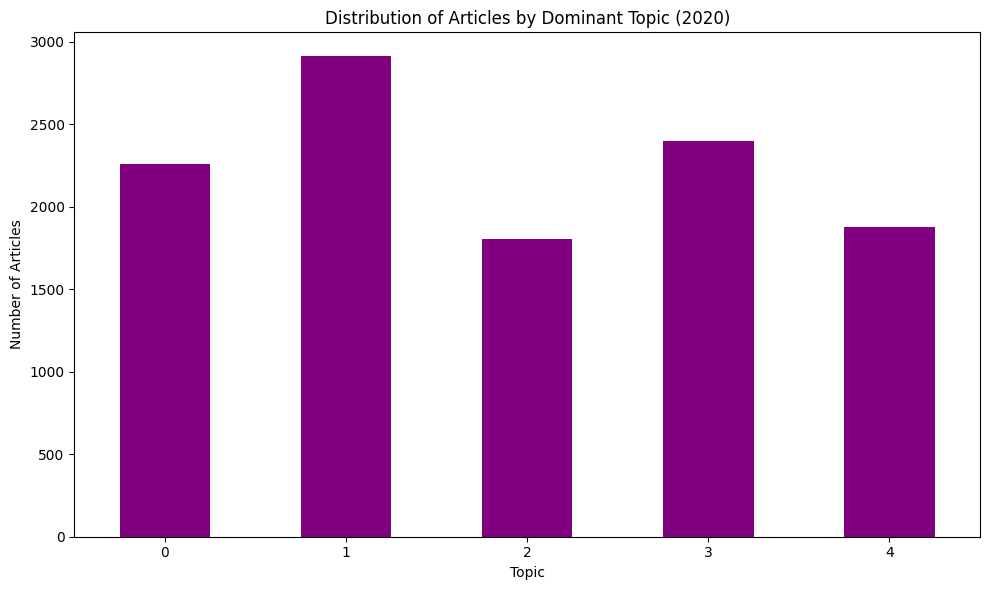

In [2]:
# ---
# title: Topic Modeling for 2020 Financial News Dataset
# description: Notebook to perform text analysis using NLP to extract keywords and identify topics
# ---

# ### 1. Download NLTK Resources
# Add project root to Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

# Download NLTK resources
try:
    nltk.download('punkt_tab', quiet=True)
    nltk.download('stopwords', quiet=True)
except Exception as e:
    print(f"Error downloading NLTK resources: {e}")
    raise

from src.nlp_utils import extract_keywords, run_topic_modeling

# ### 2. Load Cleaned News Dataset
news_columns = ['headline', 'url', 'publisher', 'date_only', 'stock']  # Updated to match current dataset
news_df = pd.read_csv('../data/fnspid_news_cleaned_2020.csv')
for col in news_columns:
    if col not in news_df.columns:
        raise ValueError(f"Missing column: {col}")

# Convert date_only to datetime (already in datetime format after cleaning, but ensure consistency)
news_df['date_only'] = pd.to_datetime(news_df['date_only'])

# ### 3. Extract Keywords
keywords_df = extract_keywords(news_df, text_column='headline', top_n=20)
print("=== Top 20 Keywords/Phrases ===")
display(keywords_df)

# Visualize top keywords
plt.figure(figsize=(12, 6))
plt.bar(keywords_df['Keyword/Phrase'], keywords_df['Frequency'], color='orange')
plt.title('Top 20 Keywords/Phrases in 2020 News Headlines')
plt.xlabel('Keyword/Phrase')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('task-1-plots/keyword_frequency_2020.png')
plt.show()

# ### 4. Run Topic Modeling
topics, topic_df = run_topic_modeling(news_df, text_column='headline', num_topics=5)
print("\n=== Identified Topics ===")
for i, topic in enumerate(topics):
    print(f"Topic {i+1}: {topic}")

print("\n=== Topic Assignments (Sample) ===")
display(topic_df.head(10))

# Visualize topic distribution
topic_counts = topic_df['Dominant_Topic'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
topic_counts.plot(kind='bar', color='purple')
plt.title('Distribution of Articles by Dominant Topic (2020)')
plt.xlabel('Topic')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('task-1-plots/topic_distribution_2020.png')
plt.show()

# ### 5. Save Results
keywords_df.to_csv('../data/keywords_2020.csv', index=False)
topic_df.to_csv('../data/topic_assignments_2020.csv', index=False)